In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from Training import model, utils, dataset, train
import numpy as np
from sklearn import preprocessing
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d

In [2]:
test_model_1 = model.ModelSmallGELU()
# load data
data = np.array(utils.parseGainAndBWCsv('Data/BW_Gain2.0.csv')).astype(float)

In [3]:
print(data.shape)
print(data)

(668, 2, 2)
[[[ 1.000e-06  1.590e+03]
  [ 3.022e+00  9.660e+10]]

 [[ 1.000e-06  1.640e+03]
  [ 3.231e+00  9.330e+10]]

 [[ 1.000e-06  1.680e+03]
  [ 3.433e+00  9.030e+10]]

 ...

 [[ 1.000e-05  8.954e+02]
  [ 5.210e-01  6.070e+10]]

 [[ 1.000e-05  9.417e+02]
  [-8.350e-01  7.100e+10]]

 [[ 1.000e-05  9.881e+02]
  [-2.015e+00  8.400e+10]]]


In [4]:
data = data.reshape(data.shape[0],4)
feature = data.T[0]

# ensure norm and denorm work 
norm, data_min, data_max = utils.normalize(feature)
feature_1 = utils.denormalize(norm, data_min, data_max)


min_max = dict()
for i in range(4):
    feature = data.T[i]
    norm_feature, data_min, data_max = utils.normalize(feature)
    data.T[i] = norm_feature
    min_max[i] = [data_min, data_max]
data = data.reshape(data.shape[0],2,2)

In [5]:
data_x = data[:, 1]
data_y = data[: ,0]
data_set = dataset.CircuitSynthesisGainAndBandwidthManually(data_x, data_y)

In [6]:
dtype = torch.FloatTensor
loss_fn = nn.L1Loss().type(dtype)  # loss can be changed here. This is the first one i tried that gave meaningful results

x = optim.Adam
optimizer1 = x(test_model_1.parameters(), lr=3e-4)#0.06448295999961791)  # TODO haven't experimented with this yet
train_data = DataLoader(data_set, batch_size=50)

In [7]:
losses, accs, part_accs = train.trainWValidation(test_model_1, train_data, train_data, loss_fn, optimizer1, num_epochs=2000, print_every=50)

t = 1, loss = 0.3418
t = 2, loss = 0.2732
t = 3, loss = 0.2096
t = 4, loss = 0.1939
t = 5, loss = 0.1956
t = 6, loss = 0.1941
t = 7, loss = 0.1939
t = 8, loss = 0.1939
t = 9, loss = 0.1930
t = 10, loss = 0.1926
t = 11, loss = 0.1923
t = 12, loss = 0.1922
t = 13, loss = 0.1917
t = 14, loss = 0.1913
t = 15, loss = 0.1910
t = 16, loss = 0.1906
t = 17, loss = 0.1903
t = 18, loss = 0.1899
t = 19, loss = 0.1896
t = 20, loss = 0.1893
t = 21, loss = 0.1889
t = 22, loss = 0.1886
t = 23, loss = 0.1882
t = 24, loss = 0.1877
t = 25, loss = 0.1873
t = 26, loss = 0.1870
t = 27, loss = 0.1866
t = 28, loss = 0.1862
t = 29, loss = 0.1856
t = 30, loss = 0.1848
t = 31, loss = 0.1850
t = 32, loss = 0.1840
t = 33, loss = 0.1835
t = 34, loss = 0.1828
t = 35, loss = 0.1822
t = 36, loss = 0.1817
t = 37, loss = 0.1810
t = 38, loss = 0.1803
t = 39, loss = 0.1796
t = 40, loss = 0.1788
t = 41, loss = 0.1781
t = 42, loss = 0.1775
t = 43, loss = 0.1766
t = 44, loss = 0.1759
t = 45, loss = 0.1752
t = 46, loss = 0.17

t = 344, loss = 0.1680
t = 345, loss = 0.1684
t = 346, loss = 0.1679
t = 347, loss = 0.1680
t = 348, loss = 0.1681
t = 349, loss = 0.1679
Got 191 / 1336 partially correct (14.30 pct)
Got 75 / 668 correct (11.23 pct)
t = 350, loss = 0.1682
t = 351, loss = 0.1679
t = 352, loss = 0.1682
t = 353, loss = 0.1679
t = 354, loss = 0.1682
t = 355, loss = 0.1679
t = 356, loss = 0.1680
t = 357, loss = 0.1682
t = 358, loss = 0.1678
t = 359, loss = 0.1682
t = 360, loss = 0.1678
t = 361, loss = 0.1682
t = 362, loss = 0.1679
t = 363, loss = 0.1682
t = 364, loss = 0.1678
t = 365, loss = 0.1682
t = 366, loss = 0.1679
t = 367, loss = 0.1680
t = 368, loss = 0.1681
t = 369, loss = 0.1680
t = 370, loss = 0.1680
t = 371, loss = 0.1679
t = 372, loss = 0.1680
t = 373, loss = 0.1679
t = 374, loss = 0.1680
t = 375, loss = 0.1678
t = 376, loss = 0.1681
t = 377, loss = 0.1679
t = 378, loss = 0.1679
t = 379, loss = 0.1680
t = 380, loss = 0.1679
t = 381, loss = 0.1678
t = 382, loss = 0.1681
t = 383, loss = 0.1679
t 

t = 679, loss = 0.1551
t = 680, loss = 0.1547
t = 681, loss = 0.1538
t = 682, loss = 0.1557
t = 683, loss = 0.1543
t = 684, loss = 0.1548
t = 685, loss = 0.1528
t = 686, loss = 0.1540
t = 687, loss = 0.1545
t = 688, loss = 0.1547
t = 689, loss = 0.1530
t = 690, loss = 0.1547
t = 691, loss = 0.1535
t = 692, loss = 0.1543
t = 693, loss = 0.1535
t = 694, loss = 0.1548
t = 695, loss = 0.1536
t = 696, loss = 0.1557
t = 697, loss = 0.1526
t = 698, loss = 0.1540
t = 699, loss = 0.1529
Got 241 / 1336 partially correct (18.04 pct)
Got 79 / 668 correct (11.83 pct)
t = 700, loss = 0.1544
t = 701, loss = 0.1515
t = 702, loss = 0.1524
t = 703, loss = 0.1536
t = 704, loss = 0.1545
t = 705, loss = 0.1514
t = 706, loss = 0.1526
t = 707, loss = 0.1535
t = 708, loss = 0.1545
t = 709, loss = 0.1514
t = 710, loss = 0.1531
t = 711, loss = 0.1524
t = 712, loss = 0.1529
t = 713, loss = 0.1523
t = 714, loss = 0.1524
t = 715, loss = 0.1528
t = 716, loss = 0.1544
t = 717, loss = 0.1520
t = 718, loss = 0.1534
t 

t = 1014, loss = 0.1401
t = 1015, loss = 0.1443
t = 1016, loss = 0.1427
t = 1017, loss = 0.1416
t = 1018, loss = 0.1436
t = 1019, loss = 0.1434
t = 1020, loss = 0.1434
t = 1021, loss = 0.1440
t = 1022, loss = 0.1398
t = 1023, loss = 0.1453
t = 1024, loss = 0.1428
t = 1025, loss = 0.1415
t = 1026, loss = 0.1440
t = 1027, loss = 0.1418
t = 1028, loss = 0.1431
t = 1029, loss = 0.1434
t = 1030, loss = 0.1408
t = 1031, loss = 0.1443
t = 1032, loss = 0.1416
t = 1033, loss = 0.1412
t = 1034, loss = 0.1426
t = 1035, loss = 0.1428
t = 1036, loss = 0.1425
t = 1037, loss = 0.1428
t = 1038, loss = 0.1402
t = 1039, loss = 0.1445
t = 1040, loss = 0.1412
t = 1041, loss = 0.1395
t = 1042, loss = 0.1438
t = 1043, loss = 0.1430
t = 1044, loss = 0.1422
t = 1045, loss = 0.1438
t = 1046, loss = 0.1392
t = 1047, loss = 0.1452
t = 1048, loss = 0.1409
t = 1049, loss = 0.1390
Got 352 / 1336 partially correct (26.35 pct)
Got 132 / 668 correct (19.76 pct)
t = 1050, loss = 0.1470
t = 1051, loss = 0.1410
t = 1052,

t = 1338, loss = 0.1085
t = 1339, loss = 0.1399
t = 1340, loss = 0.1098
t = 1341, loss = 0.1273
t = 1342, loss = 0.1191
t = 1343, loss = 0.1111
t = 1344, loss = 0.1357
t = 1345, loss = 0.1094
t = 1346, loss = 0.1340
t = 1347, loss = 0.1097
t = 1348, loss = 0.1226
t = 1349, loss = 0.1261
Got 370 / 1336 partially correct (27.69 pct)
Got 83 / 668 correct (12.43 pct)
t = 1350, loss = 0.1186
t = 1351, loss = 0.1347
t = 1352, loss = 0.1191
t = 1353, loss = 0.1205
t = 1354, loss = 0.1079
t = 1355, loss = 0.1244
t = 1356, loss = 0.1181
t = 1357, loss = 0.1130
t = 1358, loss = 0.1403
t = 1359, loss = 0.1172
t = 1360, loss = 0.1317
t = 1361, loss = 0.1183
t = 1362, loss = 0.1320
t = 1363, loss = 0.1227
t = 1364, loss = 0.1285
t = 1365, loss = 0.1196
t = 1366, loss = 0.1178
t = 1367, loss = 0.1105
t = 1368, loss = 0.1283
t = 1369, loss = 0.1109
t = 1370, loss = 0.1187
t = 1371, loss = 0.1189
t = 1372, loss = 0.1095
t = 1373, loss = 0.1279
t = 1374, loss = 0.1099
t = 1375, loss = 0.1258
t = 1376, 

t = 1657, loss = 0.1091
t = 1658, loss = 0.1046
t = 1659, loss = 0.1111
t = 1660, loss = 0.1031
t = 1661, loss = 0.1062
t = 1662, loss = 0.1060
t = 1663, loss = 0.1012
t = 1664, loss = 0.1119
t = 1665, loss = 0.1029
t = 1666, loss = 0.1140
t = 1667, loss = 0.1003
t = 1668, loss = 0.1114
t = 1669, loss = 0.1013
t = 1670, loss = 0.1071
t = 1671, loss = 0.1154
t = 1672, loss = 0.1123
t = 1673, loss = 0.1172
t = 1674, loss = 0.1061
t = 1675, loss = 0.1085
t = 1676, loss = 0.1018
t = 1677, loss = 0.1124
t = 1678, loss = 0.1007
t = 1679, loss = 0.1060
t = 1680, loss = 0.1060
t = 1681, loss = 0.1024
t = 1682, loss = 0.1128
t = 1683, loss = 0.1030
t = 1684, loss = 0.1145
t = 1685, loss = 0.1025
t = 1686, loss = 0.1129
t = 1687, loss = 0.1011
t = 1688, loss = 0.1104
t = 1689, loss = 0.1019
t = 1690, loss = 0.1034
t = 1691, loss = 0.1202
t = 1692, loss = 0.1139
t = 1693, loss = 0.1177
t = 1694, loss = 0.1078
t = 1695, loss = 0.1084
t = 1696, loss = 0.1042
t = 1697, loss = 0.1090
t = 1698, loss =

t = 1982, loss = 0.0960
t = 1983, loss = 0.1043
t = 1984, loss = 0.0977
t = 1985, loss = 0.1027
t = 1986, loss = 0.0994
t = 1987, loss = 0.1001
t = 1988, loss = 0.1074
t = 1989, loss = 0.0965
t = 1990, loss = 0.1083
t = 1991, loss = 0.0973
t = 1992, loss = 0.1016
t = 1993, loss = 0.1131
t = 1994, loss = 0.1109
t = 1995, loss = 0.1118
t = 1996, loss = 0.1033
t = 1997, loss = 0.1023
t = 1998, loss = 0.0990
t = 1999, loss = 0.1024
Got 578 / 1336 partially correct (43.26 pct)
Got 237 / 668 correct (35.48 pct)
t = 2000, loss = 0.0970


In [8]:
correct_pred_x = []
correct_pred_y = []
wrong_pred_x = []
wrong_pred_y = []

In [9]:
correct_counter = 0
for i in range(len(data_x)):
    temp_data = torch.tensor([data_x[i]])
    temp_data = temp_data.type(torch.FloatTensor)
    with torch.no_grad():
        pred = list(test_model_1(temp_data))
        if abs(pred[0][0] - data_y[i][0]) < 0.05 and abs(pred[0][1] - data_y[i][1]) < 0.05:
            correct_pred_x.append(list(data_x[i]))
            correct_pred_y.append(list(data_y[i]))
            correct_counter += 1
        else:
            wrong_pred_x.append(list(data_x[i]))
            wrong_pred_y.append(list(data_y[i]))
print(correct_counter)

237


In [10]:
cpx = np.array(correct_pred_x)
cpy = np.array(correct_pred_y)
wpx = np.array(wrong_pred_x)
wpy = np.array(wrong_pred_y)

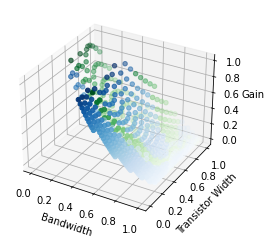

In [13]:
cax = plt.axes(projection='3d')

xdata = cpx[:,0]
zdata = cpx[:,1]
ydata = cpy[:,0]

xdataw = wpx[:,0]
zdataw = wpx[:,1]
ydataw = wpy[:,0]


cax.set_xlabel('Bandwidth')
cax.set_ylabel('Transistor Width')
cax.set_zlabel('Gain')

cax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
cax.scatter3D(xdataw, ydataw, zdataw, c=zdataw, cmap='Blues')


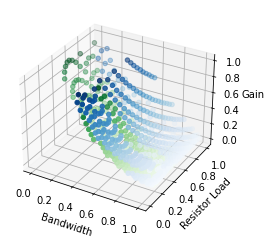

In [14]:
cax = plt.axes(projection='3d')

xdata = cpx[:,0]
zdata = cpx[:,1]
ydata = cpy[:,1]

xdataw = wpx[:,0]
zdataw = wpx[:,1]
ydataw = wpy[:,1]


cax.set_xlabel('Bandwidth')
cax.set_ylabel('Resistor Load')
cax.set_zlabel('Gain')

cax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
cax.scatter3D(xdataw, ydataw, zdataw, c=zdataw, cmap='Blues')


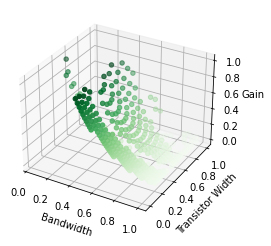

In [17]:
wax = plt.axes(projection='3d')
xdataw = wpx[:,0]
zdataw = wpx[:,1]
ydataw = wpy[:,0]

wax.set_xlabel('Bandwidth')
wax.set_ylabel('Transistor Width')
wax.set_zlabel('Gain')

wax.scatter3D(xdataw, ydataw, zdataw, c=zdataw, cmap='Greens')

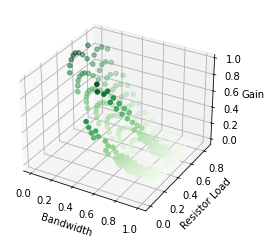

In [18]:
cax = plt.axes(projection='3d')
xdata = cpx[:,0]
zdata = cpx[:,1]
ydata = cpy[:,1]
cax.set_xlabel('Bandwidth')
cax.set_ylabel('Resistor Load')
cax.set_zlabel('Gain')

cax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

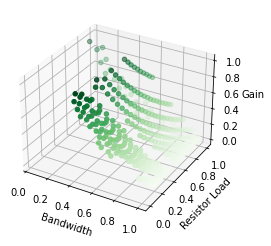

In [19]:
cax = plt.axes(projection='3d')
xdata = wpx[:,0]
zdata = wpx[:,1]
ydata = wpy[:,1]
cax.set_xlabel('Bandwidth')
cax.set_ylabel('Resistor Load')
cax.set_zlabel('Gain')

cax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')